In [1]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [5]:
df_cust_seg=pd.read_csv('C:/Users/Dell/Downloads/cust_seg.csv')
df_cust_seg.head(5)

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [6]:
df_cust_seg.drop(columns=['Unnamed: 0', 'Customer Id'], inplace=True)
df_cust_seg

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,NaN,6.8
846,28,2,7,34,0.359,2.021,0.0,7.0
847,25,4,0,18,2.802,3.210,1.0,33.4
848,32,1,12,28,0.116,0.696,0.0,2.9


In [8]:
mode = df_cust_seg['Defaulted'].mode()[0]
df_cust_seg['Defaulted'].fillna(mode, inplace=True)
df_cust_seg.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [12]:
#Use KMeans to create various customer segments.
#Use an Elbow Plot of inertia.
#And a plot of Silhouette Scores.
#Choose a K based on the results.
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_cust_seg)

C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

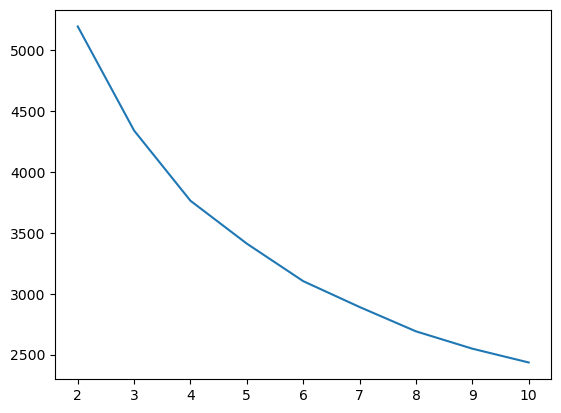

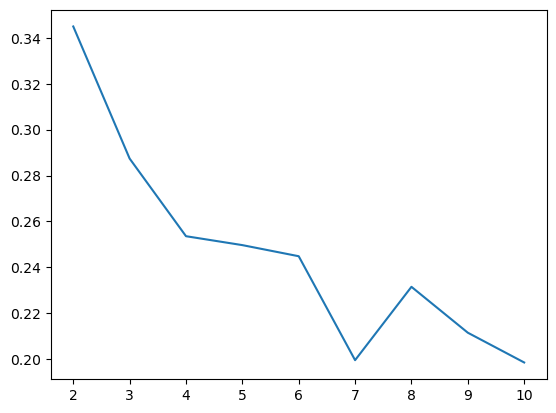

In [13]:
ks = range(2, 11)

inertias = []
sils = []

for k in ks:
  model = KMeans(n_clusters=k)
  model.fit(scaled_df)
  inertias.append(model.inertia_)
  sils.append(silhouette_score(scaled_df, model.labels_))

plt.plot(ks, inertias)

plt.show()

plt.plot(ks, sils)


In [14]:
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(scaled_df)

C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=2)

In [20]:
#Analyze the clusters you made in Part 1.  
#Create analytical visualizations that explore statistics for each feature for each cluster.
df_cust_seg['cluster'] = kmeans_model.labels_
df_cust_seg.head()
cluster_groups = df_cust_seg.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,42.549708,1.929825,16.350877,96.397661,4.077304,7.649526,0.210526,14.342690
1,1,33.135493,1.655376,6.605302,34.153166,0.947096,1.927670,0.216495,9.121208


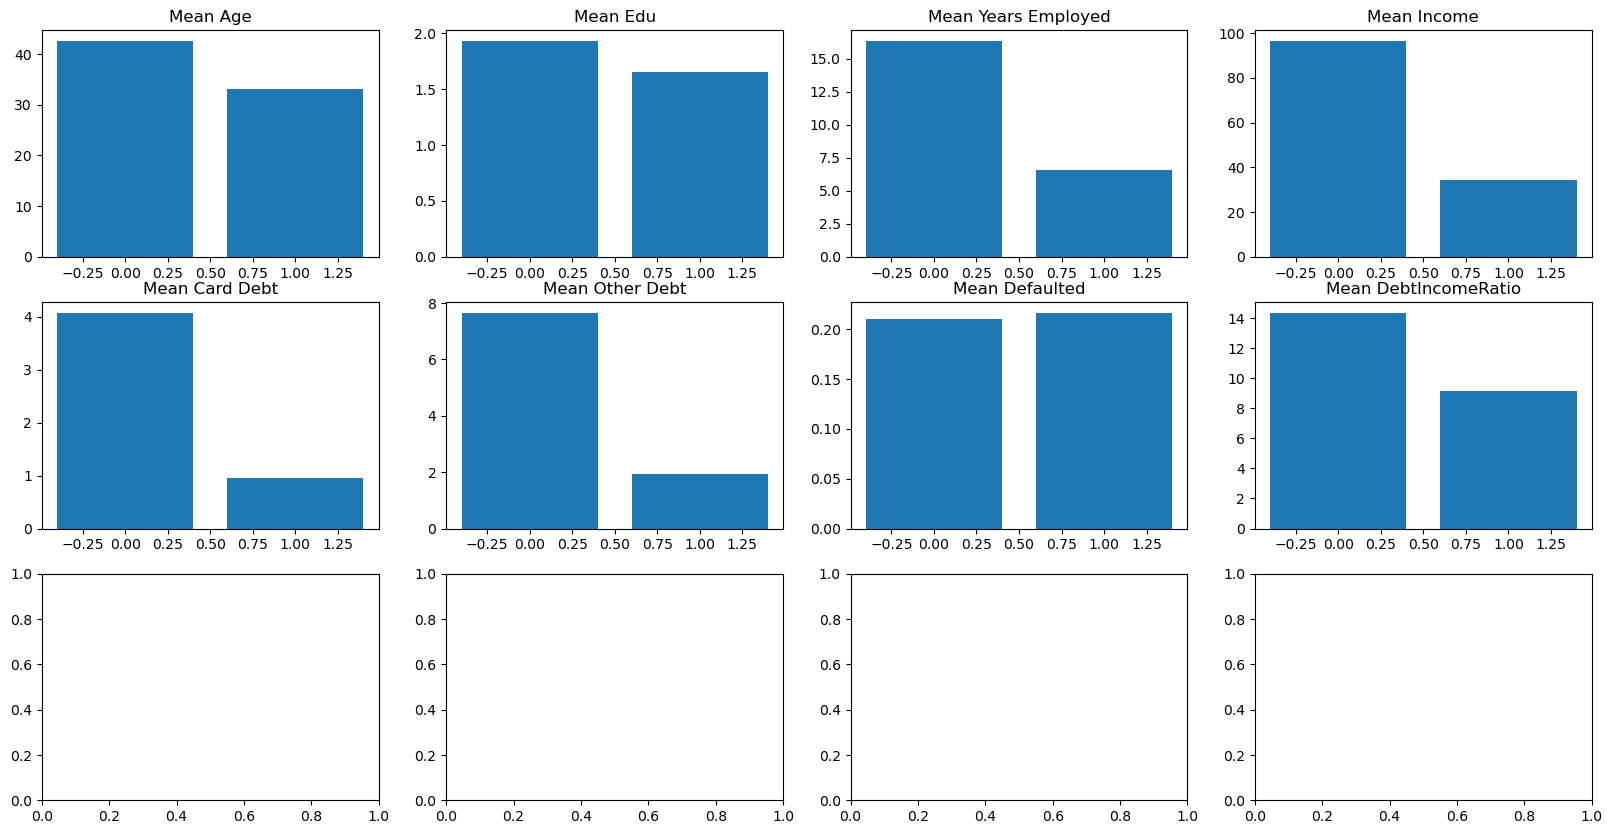

In [23]:
#Write a description of each cluster based on the visualizations you created. 
#Do more than describe the numbers; try to see beyond the numbers and describe the people represented by each cluster.
#Include at least one insight for each cluster.

fig, axes = plt.subplots(3,4, figsize = (20, 10))
axes = axes.ravel()

for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

### Cluster 0 and Cluster 1


Cluster 0 has higher Mean age, mean education level, mean years employed, Mean Income, Mean Card Debt other debts and Mean Debit come Ratio. Cluster 0 
has only less value than cluster 1 in mean defaulted. 

### Recommendations 

Card for Cluster 0 can be established for business and seniors and cards for Cluster 1 can be for students and junior people. 